In [2]:
import numpy as np
import pandas as pd

import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.metrics import max_error,mean_absolute_error,median_absolute_error,r2_score,mean_squared_log_error

import warnings

warnings.filterwarnings('ignore')

In [3]:
# Importando os dados ja preparados para a modelagem
df = pd.read_csv('processed_data.csv')

In [4]:
# Separando os dados entre treino e teste
x_data = df.drop('price',axis=1)
y = df['price'].values

x_train,x_test,y_train,y_test = train_test_split(x_data,
                                                y,
                                                test_size = 0.3,
                                                random_state=0)

In [5]:
# Construindo e Treinando o modelo
rl = LinearRegression()
rl.fit(x_train,y_train)
predicts = rl.predict(x_test)

In [19]:
# Analisando as métricas
mea =  round((mean_absolute_error(y_test,predicts)/100000),5)
r2 =    round((r2_score(y_test,predicts)),5)
me_log = round((mean_squared_log_error(y_test,predicts)),5)


print(f'Mean_Absolute_Error : {mea} 10^5')
print('')
print(f'Mean_Squared_Logarithmic_Error : {me_log}')
print('')
print(f'R2_Score: {r2*100}%')

Mean_Absolute_Error : 0.72186 10^5

Mean_Squared_Logarithmic_Error : 0.02734

R2_Score: 65.27%


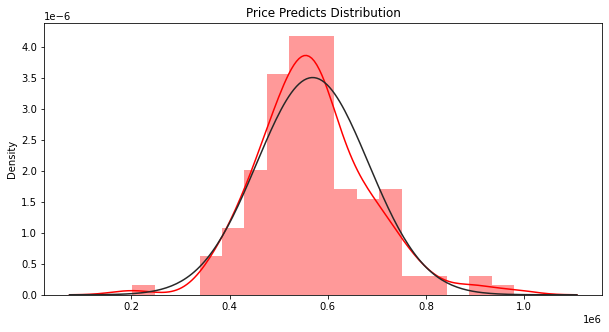

In [7]:
# Analisando a distribuição das previsões
from scipy.stats import norm
plt.figure(figsize = (10,5))
sns.distplot(predicts,color ='Red')
plt.title('Price Predicts Distribution')
plt.show()